# [COVID-19] - Data visualization and Analysis.

Covid-19, also known as coronavirus, is an infectious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). It was primally identified in December 2019 in Wuhan, China and has spread globally, resulting in an ongoing pandemic (Wikipedia). This notebook shows the impact caused by covid around the world and brings a brief study in Brazil.


---

#### Last time executed:

In [114]:
import datetime as dt
print(dt.datetime.now())

2020-06-04 23:20:06.064175


#### Libraries:

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

#### Data obtained from Johns Hopkins University.<br> 
Source: https://github.com/CSSEGISandData/COVID-19

In [116]:
df_confirmed_cases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/C" +
                                 "OVID-19/master/csse_covid_19_data/csse_covid_19_ti" +
                                 "me_series/time_series_covid19_confirmed_global.csv")
df_recovered_cases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVI" +
                                 "D-19/master/csse_covid_19_data/csse_covid_19_time_ser" +
                                 "ies/time_series_covid19_recovered_global.csv")
df_death_cases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/" +
                             "master/csse_covid_19_data/csse_covid_19_time_series/time_s" +
                             "eries_covid19_deaths_global.csv")

In [117]:
df_confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,11173,11831,12456,13036,13659,14525,15205,15750,16509,17267
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1004,1029,1050,1076,1099,1122,1137,1143,1164,1184
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,8503,8697,8857,8997,9134,9267,9394,9513,9626,9733
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,763,763,763,763,764,764,764,765,844,851
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,70,70,71,74,81,84,86,86,86,86


In [118]:
df_recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1097,1128,1138,1209,1259,1303,1328,1428,1450,1522
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,795,803,812,823,851,857,872,877,891,898
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4747,4918,5129,5277,5422,5549,5748,5894,6067,6218
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,663,676,676,681,684,692,694,698,733,735
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,18,18,18,18,18,18,18,18,18,18


In [119]:
df_death_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,219,220,227,235,246,249,257,265,270,294
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,32,33,33,33,33,33,33,33,33,33
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,609,617,623,630,638,646,653,661,667,673
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4


In [120]:
start_date = '1/22/20'
# end_date = (dt.datetime.today() - dt.timedelta(days=1)).strftime('%-m/%d/%y')
end_date = df_confirmed_cases.columns[-1]

In [121]:
df_top10 = df_confirmed_cases.groupby(['Country/Region']).sum()
df_top10 = df_top10.loc[:, start_date:end_date]
df_top10 = df_top10.sort_values(by=[end_date]).tail(10)

In [122]:
df_top10

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Peru,0,0,0,0,0,0,0,0,0,0,...,123979,129751,135905,141779,148285,155671,164476,170039,170039,178914
Germany,0,0,0,0,0,1,4,4,4,5,...,180600,181200,181524,182196,182922,183189,183410,183594,183879,184121
France,0,0,2,3,3,3,4,5,5,5,...,183067,182847,183038,186364,186923,188752,189009,189348,188450,192330
India,0,0,0,0,0,0,0,0,1,1,...,144950,150793,158086,165386,173491,181827,190609,198370,207191,216824
Italy,0,0,0,0,0,0,0,0,0,2,...,230158,230555,231139,231732,232248,232664,232997,233197,233515,233836
Spain,0,0,0,0,0,0,0,0,0,0,...,235400,236259,236259,237906,238564,239228,239479,239638,239932,240326
United Kingdom,0,0,0,0,0,0,0,0,0,2,...,262547,266599,268619,270508,272607,274219,276156,277736,279392,281270
Russia,0,0,0,0,0,0,0,0,0,2,...,353427,362342,370680,379051,387623,396575,405843,414328,423186,431715
Brazil,0,0,0,0,0,0,0,0,0,0,...,374898,391222,411821,438238,465166,498440,514849,526447,555383,584016


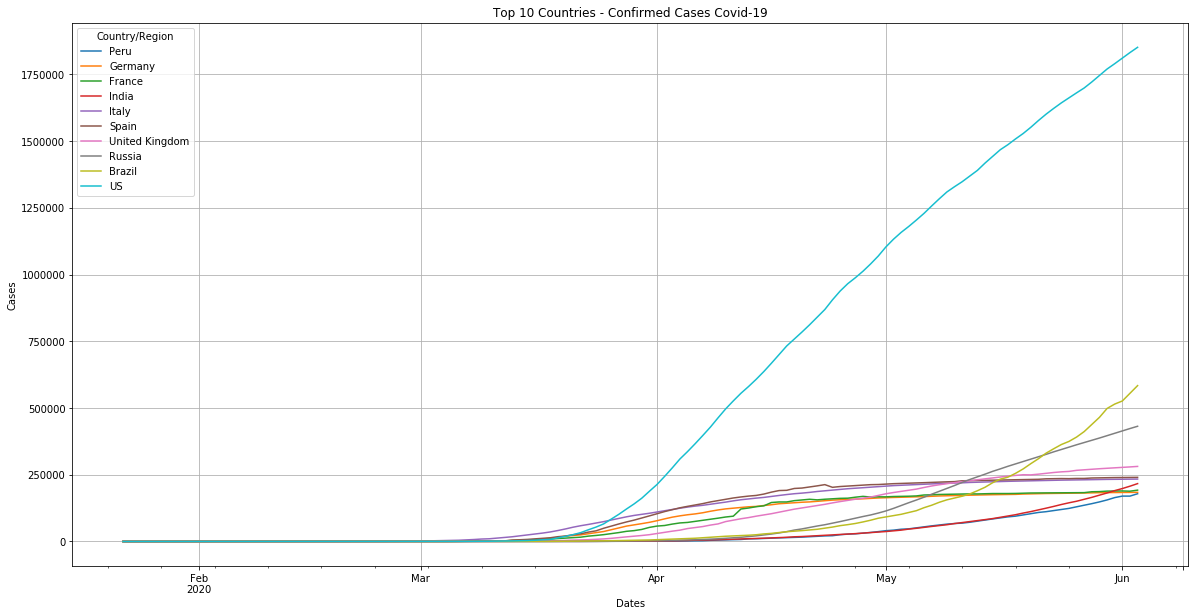

In [123]:
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(1,1,1)
df_top10 = df_top10.T
df_top10.index = pd.to_datetime(df_top10.index)
df_top10.plot(ax=ax, legend=True)
ax.set_title("Top 10 Countries - Confirmed Cases Covid-19", fontsize=12)
ax.grid(True)
ax.set(xlabel='Dates', ylabel="Cases");

Extracting data about recovered cases from Top 10 Countries Confimed Cases by name.

In [124]:
top10_countries = df_top10.columns.tolist() # Name of countries inside top 10
# Searching recovered cases with the top10 countries name.
df_recovered = df_recovered_cases.loc[df_recovered_cases['Country/Region'].isin(top10_countries)]
df_recovered = df_recovered.groupby(['Country/Region']).sum()
df_recovered = df_recovered.loc[:, start_date:end_date]
df_recovered = df_recovered.sort_values(by=[end_date]).tail(10)

In [125]:
df_recovered

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
United Kingdom,0,0,0,0,0,0,0,0,0,0,...,1161,1161,1166,1167,1172,1187,1190,1221,1224,1212
France,0,0,0,0,0,0,0,0,0,0,...,65317,65997,66702,67309,67921,68386,68473,68558,68930,69573
Peru,0,0,0,0,0,0,0,0,0,0,...,50949,52906,56169,59442,62791,66447,67208,68507,69257,72319
India,0,0,0,0,0,0,0,0,0,0,...,60706,64277,67749,70920,82627,86936,91852,95754,100285,104071
Spain,0,0,0,0,0,0,0,0,0,0,...,150376,150376,150376,150376,150376,150376,150376,150376,150376,150376
Italy,0,0,0,0,0,0,0,0,0,0,...,141981,144658,147101,150604,152844,155633,157507,158355,160092,160938
Germany,0,0,0,0,0,0,0,0,0,0,...,161199,161967,162820,163360,164245,164908,165352,165632,166609,167453
Russia,0,0,0,0,0,0,0,0,0,0,...,118798,131129,142208,150993,159257,167469,171883,175514,186602,195559
Brazil,0,0,0,0,0,0,0,0,0,0,...,153833,158593,166647,177604,189476,200892,206555,211080,223638,238617


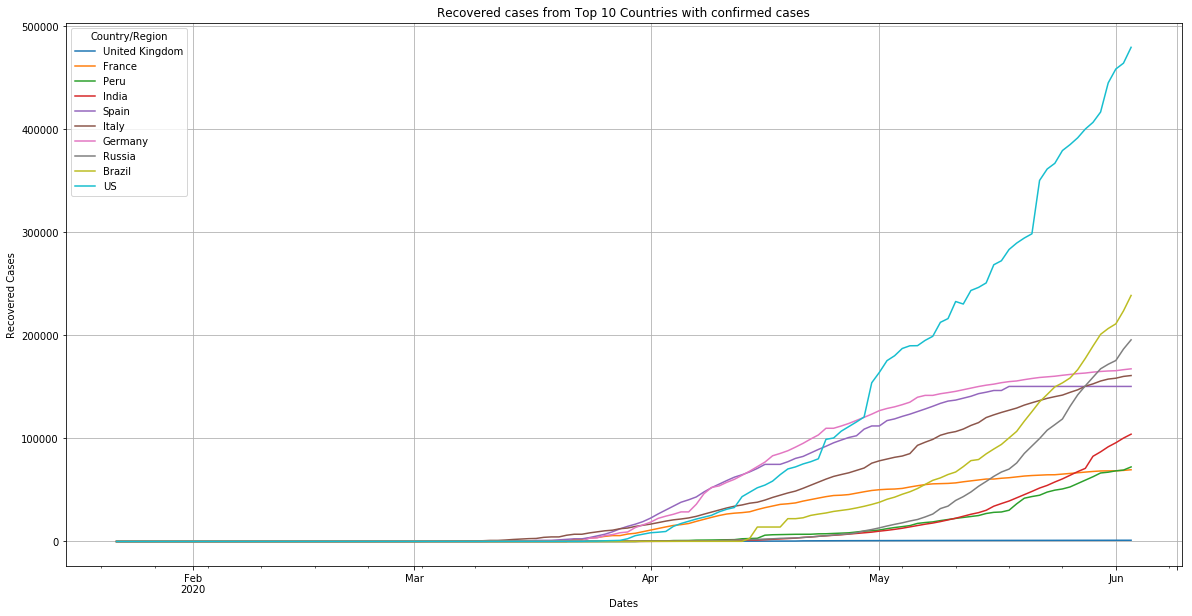

In [126]:
fig = plt.figure(figsize = (20, 10))
ax_2 = fig.add_subplot(1,1,1)
df_recovered = df_recovered.T
df_recovered.index = pd.to_datetime(df_recovered.index)
df_recovered.plot(ax=ax_2, legend=True)
ax_2.set_title("Recovered cases from Top 10 Countries with confirmed cases", fontsize=12)
ax_2.grid(True)
ax_2.set(xlabel='Dates', ylabel='Recovered Cases');

In [127]:
df_death = df_death_cases.loc[df_death_cases['Country/Region'].isin(top10_countries)]
df_death = df_death.groupby(['Country/Region']).sum()
df_death = df_death.loc[:, start_date:end_date]
df_death = df_death.sort_values(by=[end_date]).tail(10)

In [128]:
df_death

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Peru,0,0,0,0,0,0,0,0,0,0,...,3629,3788,3983,4099,4230,4371,4506,4634,4634,4894
Russia,0,0,0,0,0,0,0,0,0,0,...,3633,3807,3968,4142,4374,4555,4693,4849,5031,5208
India,0,0,0,0,0,0,0,0,0,0,...,4172,4344,4534,4711,4980,5185,5408,5608,5829,6088
Germany,0,0,0,0,0,0,0,0,0,0,...,8309,8372,8428,8470,8504,8530,8540,8555,8563,8602
Spain,0,0,0,0,0,0,0,0,0,0,...,26834,27117,27117,27119,27121,27125,27127,27127,27127,27128
France,0,0,0,0,0,0,0,0,0,0,...,28460,28533,28599,28665,28717,28774,28805,28836,28943,29024
Brazil,0,0,0,0,0,0,0,0,0,0,...,23473,24512,25598,26754,27878,28834,29314,29937,31199,32548
Italy,0,0,0,0,0,0,0,0,0,0,...,32877,32955,33072,33142,33229,33340,33415,33475,33530,33601
United Kingdom,0,0,0,0,0,0,0,0,0,0,...,36996,37130,37542,37919,38243,38458,38571,39127,39452,39811


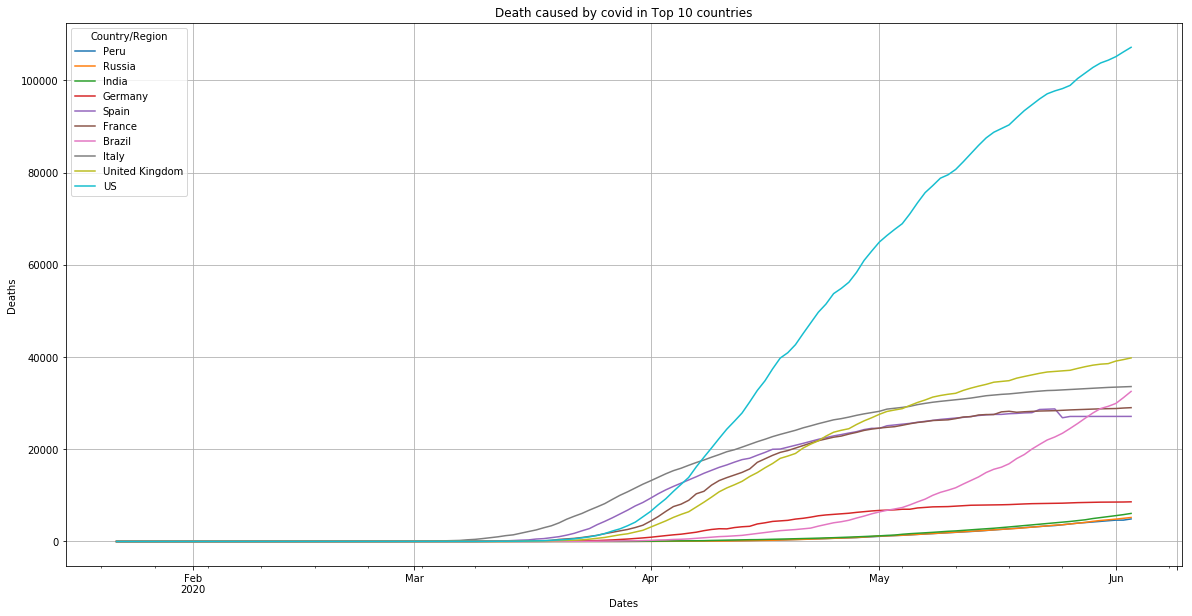

In [129]:
fig = plt.figure(figsize = (20, 10))
ax_4 = fig.add_subplot(1,1,1)
df_death = df_death.T
df_death.index = pd.to_datetime(df_death.index)
df_death.plot(ax=ax_4, legend=True)
ax_4.set_title("Death caused by covid in Top 10 countries", fontsize=12)
ax_4.grid(True)
ax_4.set(xlabel='Dates', ylabel='Deaths');

$$\text{Active cases} = Confirmed - Recovered - Deaths $$

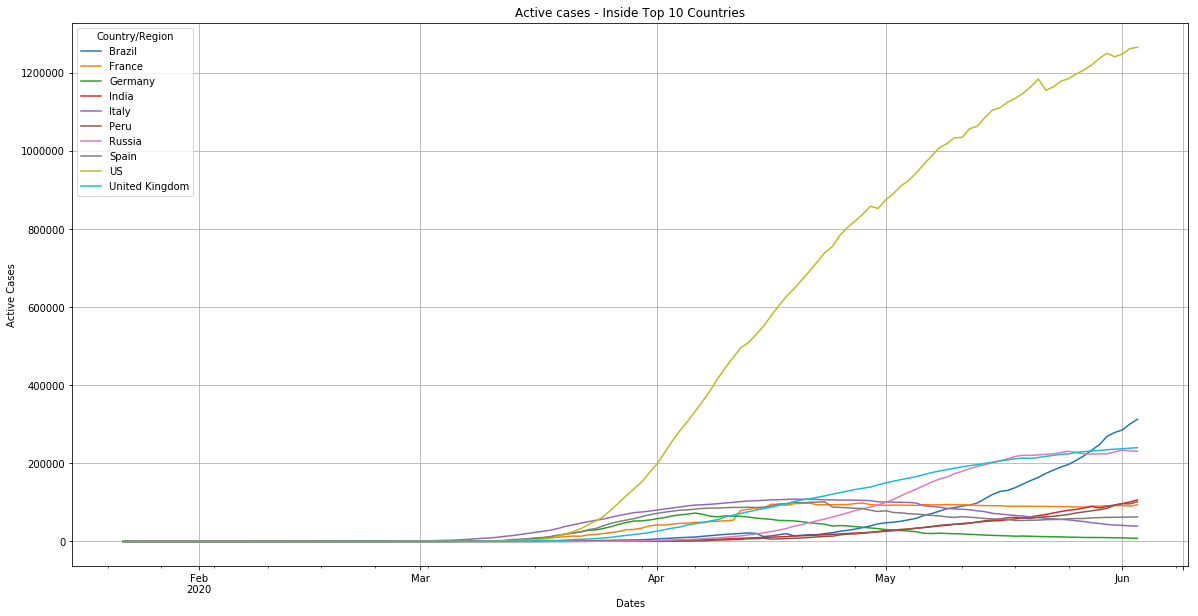

In [130]:
fig = plt.figure(figsize = (20, 10))
ax_5 = fig.add_subplot(1,1,1)
df_active = df_top10 - df_recovered - df_death
df_active.plot(ax=ax_5, legend=True)
ax_5.set_title("Active cases - Inside Top 10 Countries", fontsize=12)
ax_5.grid(True)
ax_5.set(xlabel='Dates', ylabel='Active Cases');

---

## Brazil case study


In [131]:
df_brazil_confirmed = df_confirmed_cases.loc[df_confirmed_cases['Country/Region'].isin(['Brazil'])]
df_brazil_recovered = df_recovered_cases.loc[df_recovered_cases['Country/Region'].isin(['Brazil'])]
df_brazil_deaths = df_death_cases.loc[df_death_cases['Country/Region'].isin(['Brazil'])]

In [132]:
df_brazil_confirmed = df_brazil_confirmed.loc[:,start_date:end_date].T
df_brazil_confirmed.index = pd.to_datetime(df_brazil_confirmed.index)
df_brazil_confirmed.columns = ['Cases']

df_brazil_recovered = df_brazil_recovered.loc[:,start_date:end_date].T
df_brazil_recovered.index = pd.to_datetime(df_brazil_recovered.index)
df_brazil_recovered.columns = ['Cases']

df_brazil_deaths = df_brazil_deaths.loc[:,start_date:end_date].T
df_brazil_deaths.index = pd.to_datetime(df_brazil_deaths.index)
df_brazil_deaths.columns = ['Cases']

df_brazil_active = df_brazil_confirmed - df_brazil_recovered - df_brazil_deaths
df_brazil_closed = df_brazil_recovered + df_brazil_deaths

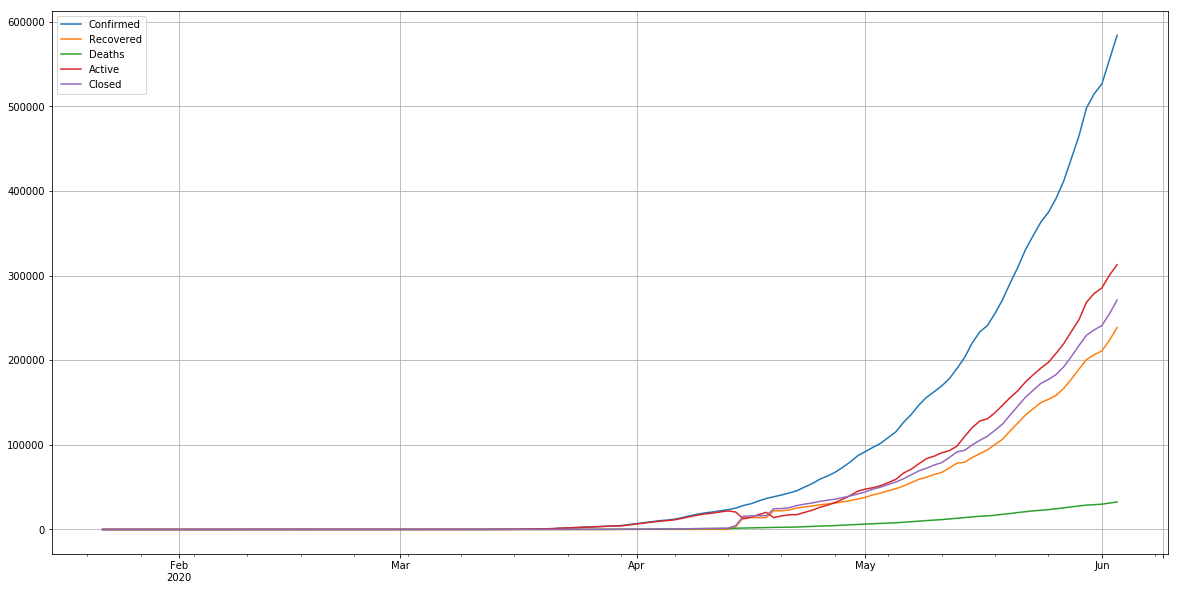

In [133]:
fig = plt.figure(figsize = (20, 10))
ax_6 = fig.add_subplot(1,1,1)
legend_name = ['Confirmed', 'Recovered', 'Deaths', 'Active', 'Closed']
df_brazil_confirmed.plot(ax=ax_6, legend=True)
df_brazil_recovered.plot(ax=ax_6, legend=True)
df_brazil_deaths.plot(ax=ax_6, legend=True)
df_brazil_active.plot(ax=ax_6, legend=True)
df_brazil_closed.plot(ax=ax_6, legend=True)
ax_6.legend(legend_name)
ax_6.grid(True)

### Data about last 24 hours

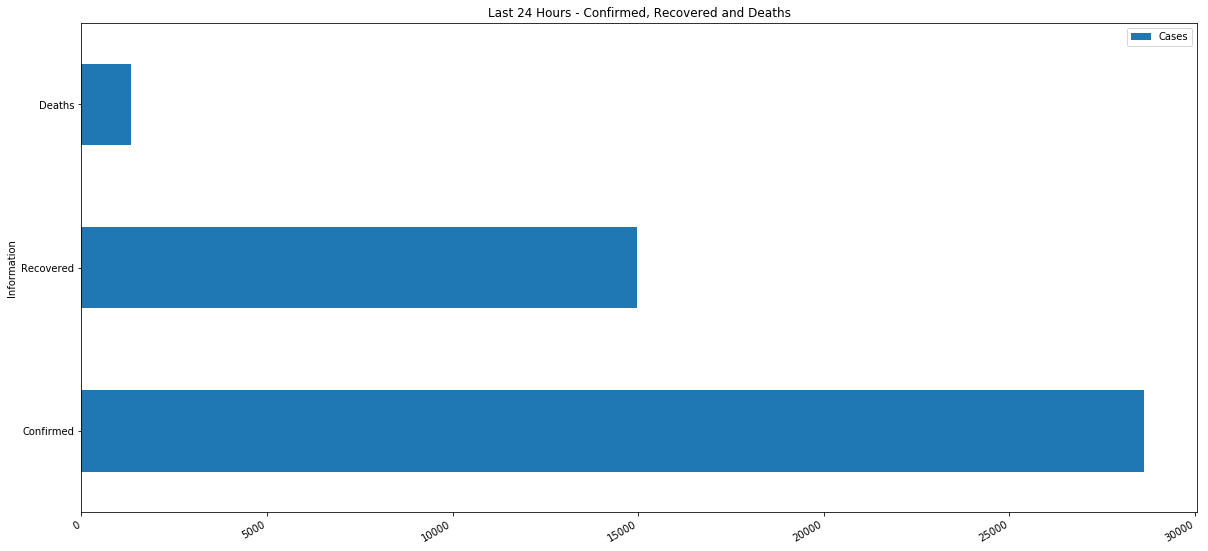

In [134]:
confirmed_daily = df_brazil_confirmed.iloc[-1,0] - df_brazil_confirmed.iloc[-2,0]
recovered_daily = df_brazil_recovered.iloc[-1,0] - df_brazil_recovered.iloc[-2,0]
deaths_daily = df_brazil_deaths.iloc[-1,0] - df_brazil_deaths.iloc[-2,0]
data = {'Information':['Confirmed', 'Recovered', 'Deaths'], 'Cases':[confirmed_daily, recovered_daily, deaths_daily]}
df_last24hours = pd.DataFrame(data)
fig = plt.figure(figsize = (20, 10))
ax_7 = fig.add_subplot(1,1,1)
df_last24hours.plot.barh(ax=ax_7, x='Information')
ax_7.set_title("Last 24 Hours - Confirmed, Recovered and Deaths",fontsize=12)
fig.autofmt_xdate()

### Growth rate by week in Brazil

In [135]:
df_growth_confirmed = df_brazil_confirmed.pct_change(axis='index', periods=7)
df_growth_recovered = df_brazil_recovered.pct_change(axis='index', periods=7)
df_growth_deaths = df_brazil_deaths.pct_change(axis='index', periods=7)

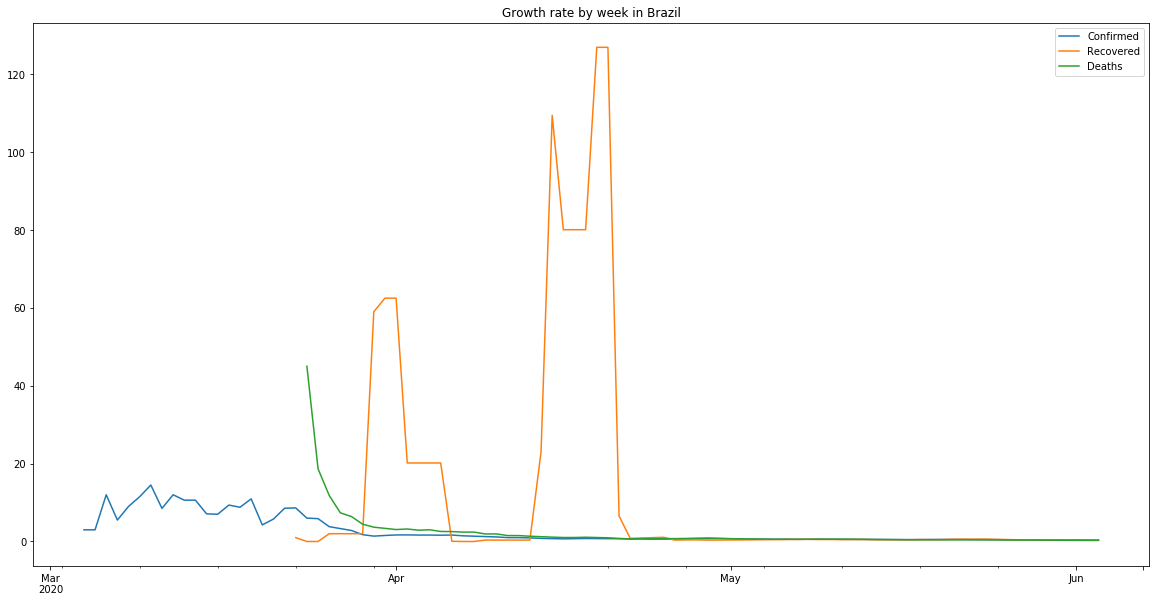

In [136]:
fig = plt.figure(figsize = (20, 10))
ax_8 = fig.add_subplot(1,1,1)
df_names = ['Confirmed', 'Recovered', 'Deaths']
df_growth_confirmed.plot(ax=ax_8, legend=True)
df_growth_recovered.plot(ax=ax_8, legend=True)
df_growth_deaths.plot(ax=ax_8, legend=True)
ax_8.set_title('Growth rate by week in Brazil', fontsize=12)
ax_8.legend(df_names);

### Growth rate by day in Brazil

In [137]:
df_growth_confirmed = df_brazil_confirmed.pct_change(axis='index', periods=1)
df_growth_recovered = df_brazil_recovered.pct_change(axis='index', periods=1)
df_growth_deaths = df_brazil_deaths.pct_change(axis='index', periods=1)

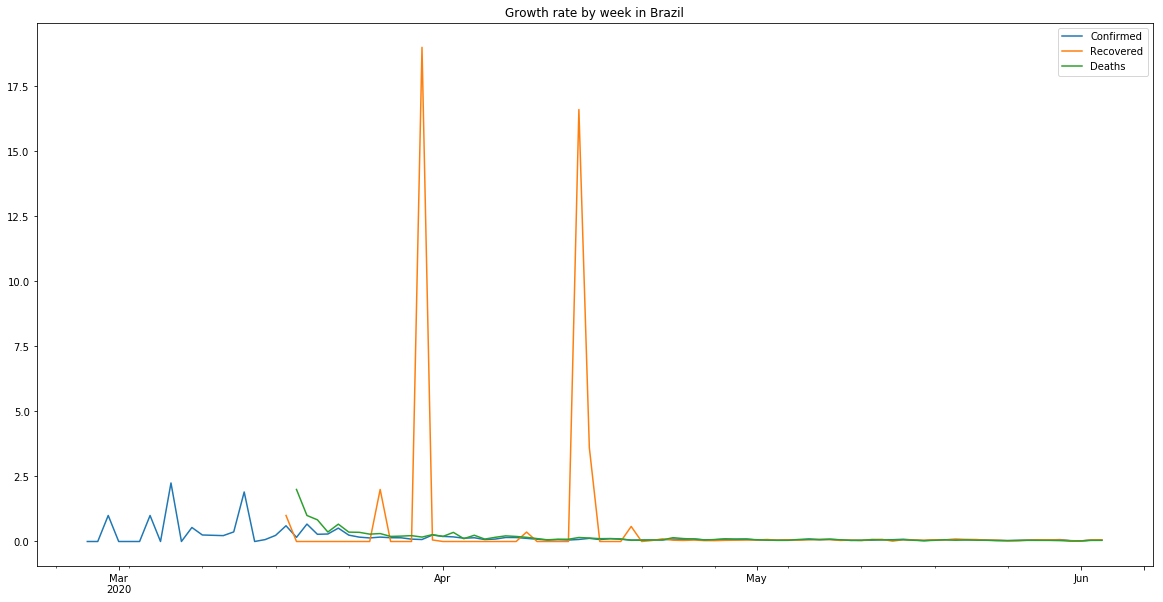

In [138]:
fig = plt.figure(figsize = (20, 10))
ax_9 = fig.add_subplot(1,1,1)
df_names = ['Confirmed', 'Recovered', 'Deaths']
df_growth_confirmed.plot(ax=ax_9, legend=True)
df_growth_recovered.plot(ax=ax_9, legend=True)
df_growth_deaths.plot(ax=ax_9, legend=True)
ax_9.set_title('Growth rate by week in Brazil', fontsize=12)
ax_9.legend(df_names);

### Mortality rate and Recovery rate


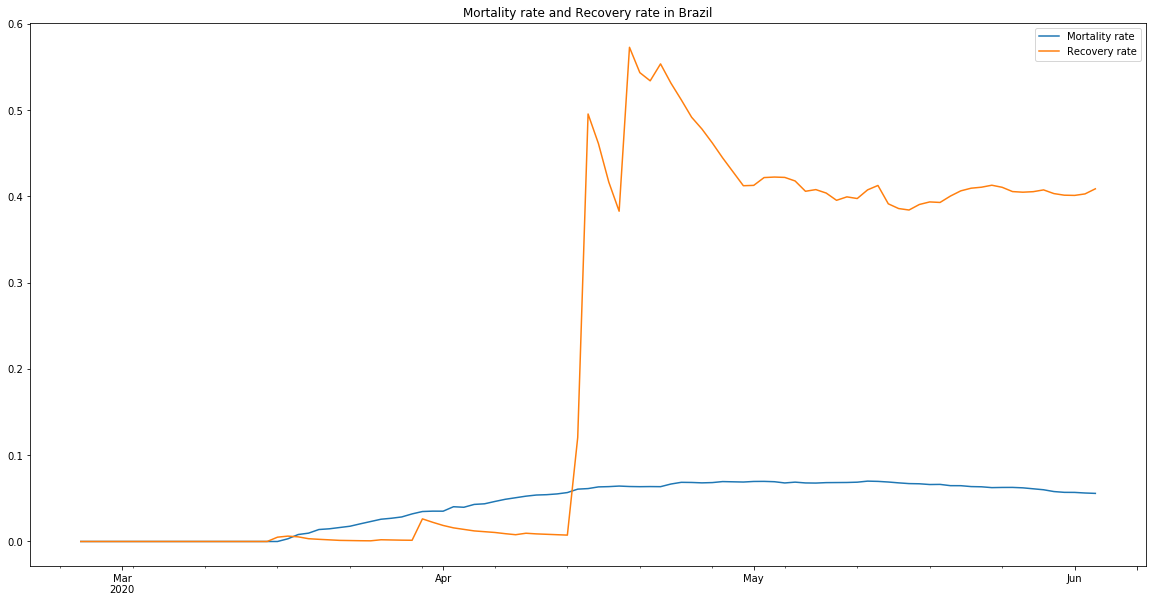

In [139]:
mortality_rate = df_brazil_deaths/df_brazil_confirmed
recovery_rate = df_brazil_recovered/df_brazil_confirmed
fig = plt.figure(figsize = (20, 10))
ax_10 = fig.add_subplot(1,1,1)
df_names=['Mortality rate','Recovery rate']
mortality_rate.plot(ax=ax_10)
recovery_rate.plot(ax=ax_10)
ax_10.legend(df_names)
ax_10.set_title('Mortality rate and Recovery rate in Brazil', fontsize=12);

### Doubling Rate

$\text{This formula represents the days necessary to cases double.}$

$$\text{Doubling rate} = \frac{T}{(\log _{2}(\text{Total cases until day (X + T)}) - \log _{2}(\text{Total cases until day (X)})}$$

$\text{Where T is a period in days and X is a specific day to start a period.}$


#### Doubling rate of confirmed cases

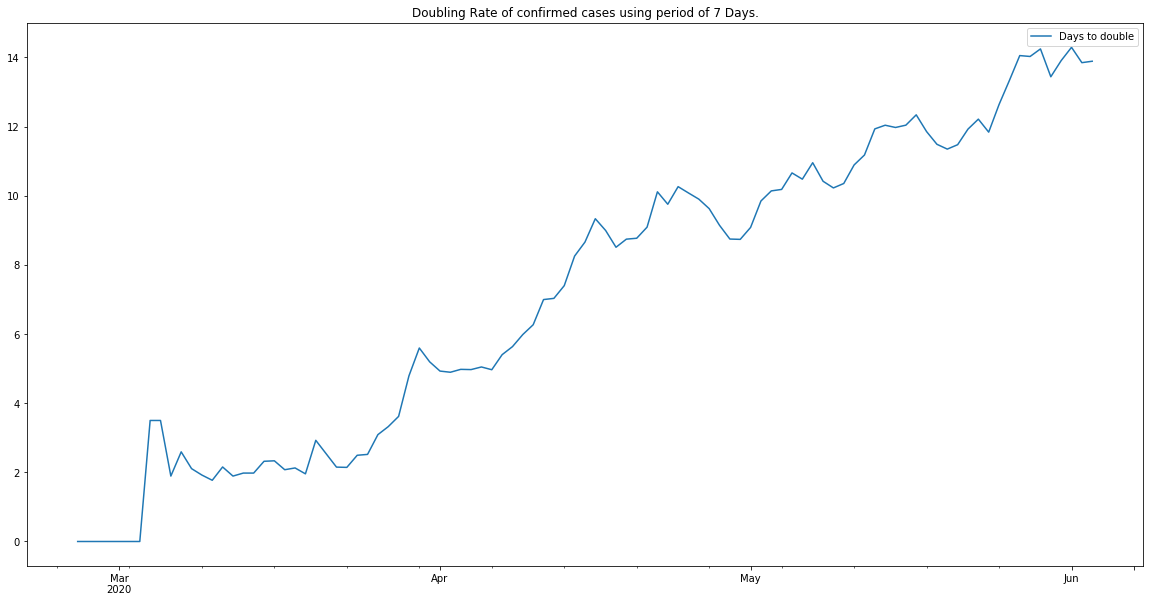

In [140]:
def doubling_rate_week(x):
    return 7/x

fig = plt.figure(figsize = (20, 10))
ax_11 = fig.add_subplot(1,1,1)
doubling_confirmed = df_brazil_confirmed.apply(np.log2, axis=0) # Log2(All Days)
doubling_confirmed = doubling_confirmed.diff(periods=7, axis=0) # Log2(Day+7) - Log2(7)
doubling_confirmed = doubling_confirmed.apply(doubling_rate_week, axis=0) # 7/(Log2(Day+7)-Log2(Day))

doubling_confirmed.plot(ax=ax_11)
ax_11.legend(['Days to double'])
ax_11.set_title('Doubling Rate of confirmed cases using period of 7 Days.', fontsize=12);


#### Doubling rate of recovered cases

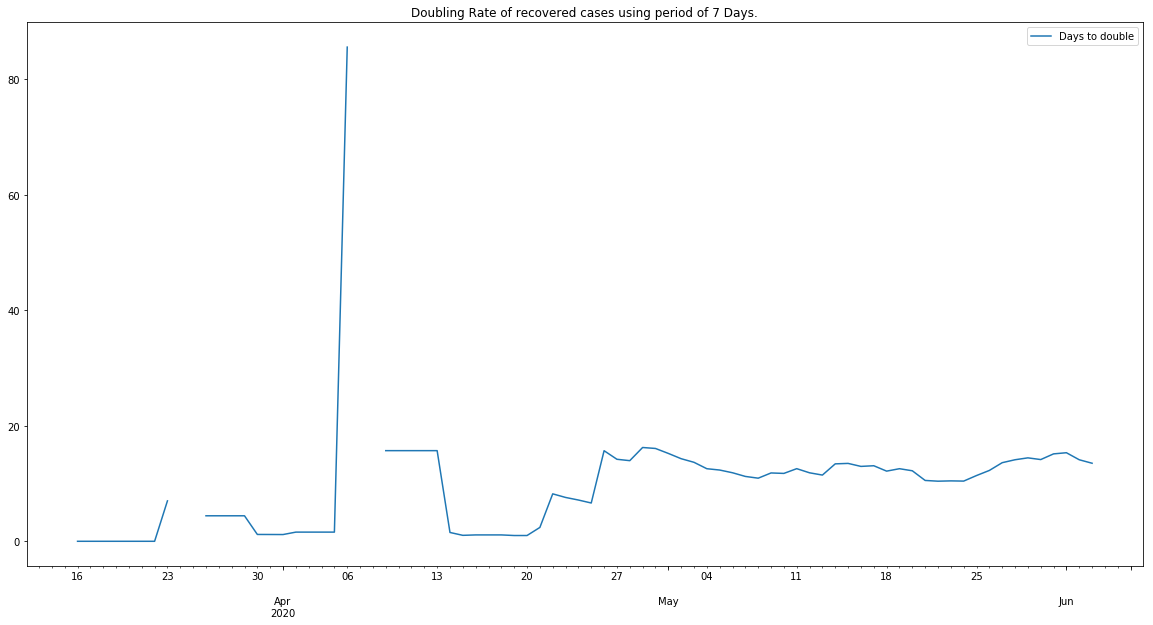

In [141]:
fig = plt.figure(figsize = (20, 10))
ax_12 = fig.add_subplot(1,1,1)
doubling_recovered = df_brazil_recovered.apply(np.log2, axis=0) # Log2(All Days)
doubling_recovered = doubling_recovered.diff(periods=7, axis=0) # Log2(Day+7) - Log2(7)
doubling_recovered = doubling_recovered.apply(doubling_rate_week, axis=0) # 7/(Log2(Day+7)-Log2(Day))
doubling_recovered.plot(ax=ax_12)
ax_12.legend(['Days to double'])
ax_12.set_title('Doubling Rate of recovered cases using period of 7 Days.', fontsize=12);

#### Doubling rate of death cases

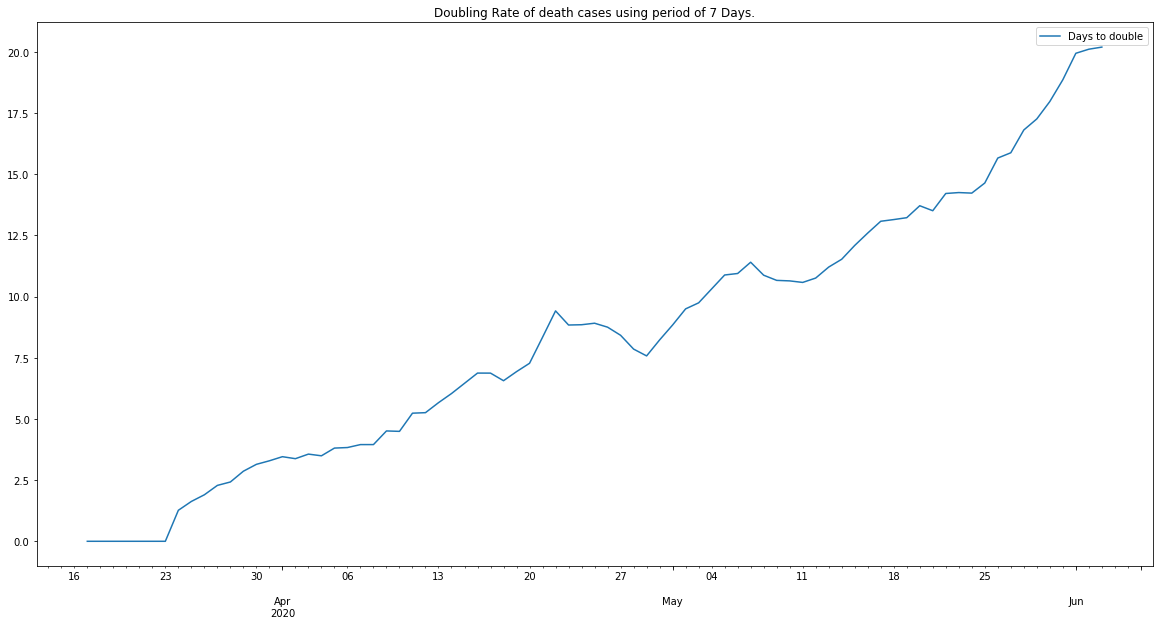

In [142]:
fig = plt.figure(figsize = (20, 10))
ax_13 = fig.add_subplot(1,1,1)
doubling_deaths = df_brazil_deaths.apply(np.log2, axis=0) # Log2(All Days)
doubling_deaths = doubling_deaths.diff(periods=7, axis=0) # Log2(Day+7) - Log2(7)
doubling_deaths = doubling_deaths.apply(doubling_rate_week, axis=0) # 7/(Log2(Day+7)-Log2(Day))
doubling_deaths.plot(ax=ax_13)
ax_13.legend(['Days to double'])
ax_13.set_title('Doubling Rate of death cases using period of 7 Days.', fontsize=12);

---

### Animated Graphics

In [143]:
df_top10.columns.name = None
df_top10_ani = df_top10.reset_index()

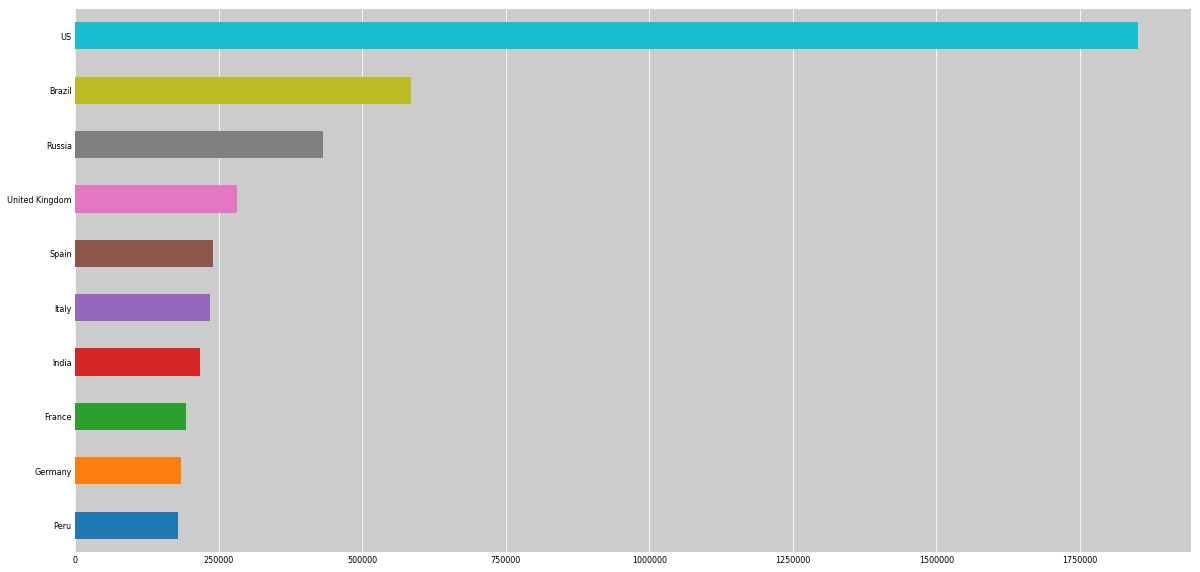

In [148]:
def nice_axes(ax):
    ax.set_facecolor('.8')
    ax.tick_params(labelsize=8, length=0)
    ax.grid(True, axis='x', color='white')
    ax.set_axisbelow(True)
    [spine.set_visible(False) for spine in ax.spines.values()]
    
fig = plt.figure(figsize = (20, 10))
ax_14 = fig.add_subplot(1,1,1)
teste = df_top10.loc['2020-06-03']
teste.plot.barh(ax=ax_14)
nice_axes(ax_14)